# NORMALISATION DES DONNEES

In [2]:
import pandas as pd
import numpy as np
import nltk
import string
import regex
import re
import seaborn as sn
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from textblob import Word
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
plt.style.use('ggplot')

In [60]:
# import des données
dataset3 = pd.read_csv("data_set_version_final.csv")

### suppréssion des ponctuations:

In [61]:
# chargement de tous les sous modules du packages nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [62]:
# supprission des ponctuations
rm_ponct = str.maketrans('','',string.punctuation)
dataset3.description = dataset3.description.apply(lambda x:x.translate(rm_ponct))

In [63]:
# suppression les unicodes
dataset3.description = dataset3.description.apply(lambda x:x.encode("ascii","ignore").decode("utf-8"))

In [64]:
# suppression des URLs
dataset3.description = dataset3.description.apply(lambda x:re.sub(r'http\S+',"",x))

In [65]:
# suppression des stopwords
stop_en = stopwords.words("english")
dataset3.description = dataset3.description.apply(lambda x:" ".join(x.lower() for x in np.str(x).split() if x not in stop_en))

In [66]:
# Lemmatisation
dataset3.description = dataset3.description.apply(lambda x:" ".join([Word(word).lemmatize() for word in x.split()]))

In [67]:
dataset3.to_csv("Final_database_clean.csv",index=False)

# PRESENTATION DE TF-IDF

### Principe de la méthode

TF ou term frequency:

Le TF consisite tout simplement à calculer le nombre d'occurence d'un terme dans un document, soit la fréquence. On définit le TF comme suite:

Soit P l'ensemble des lettres qui se trouvent dans notre corpus. Soit i l'indice d'une lettre se trouvent dans P et j l'indice d'un document dans notre corpus.

### IDF ou Inverse Frequency Document:
La fréquence inverse de document (inverse document frequency) est une mesure de l'importance du terme dans l'ensemble du corpus.Dans le schéma TF-IDF, elle vise à donner un poids plus important aux termes les moins fréquents, considérés comme plus discriminants. Elle consiste à calculer le logarithme (en base 10 ou en base 21) de l'inverse de la proportion de documents du corpus qui contiennent le terme : 
$$IDF_{i,j}=log\left( \frac{|D|}{|d_j,t_i \in d_j|}\right)+1$$
- $|D|$: Nombre total de documents dans le corpus.
- $|d_j,t_i \in d_j|$: Nombre de document où apparait le mot $t_i$ dans le corpus.

### TF-IDF:

On définit le TF-IDF d'une lettre par:
$$TF\_IDF_{i,j}=TF_{i,j}\times IDF_{i,j}$$

Dans sklearn, le résulatat noud donne directement la matrice 

# PREDICTION AVEC LA MATRICE TF-IDF

En utilisant la matrice du TFIDF, on peut réaliser une prédiction. Appliquons le TFIDF avec notre vraie données textuelle. Comme dans les données test et train on a pas le même nombre de mots, on va alors utiliser un PIPLINE pour pouvoir faire la prédiction sur nos données test. Dans la partie prédiction, on va tester le multinomial naive baesienne

Nous allons proceder à la division des données en deux parties parties : données d'entrainement et de test

In [6]:
data=pd.read_csv("Final_database_clean.csv")

# DETERMINATION DU NOMBRE DE LIGNES PAR CLASSE

In [7]:
classes, nbpoint = np.unique(data["Labels"], return_counts=True)
print("On a {} classes :\n{}\n\n".format(len(classes),classes))
for ind, cl in enumerate(classes):
    print("Pour la classe {}, on a {} nombres de lignes".format(cl, nbpoint[ind] ))
print("Nombre de points total:",len(data["Labels"]))

On a 11 classes :
['Finance_actuariat' 'chirurgien' 'cryptography' 'data scientist'
 'dentist' 'developer' 'ditital_marketing' 'network_engineer' 'nurse'
 'pharmacist' 'robotic']


Pour la classe Finance_actuariat, on a 5087 nombres de lignes
Pour la classe chirurgien, on a 26462 nombres de lignes
Pour la classe cryptography, on a 10560 nombres de lignes
Pour la classe data scientist, on a 11374 nombres de lignes
Pour la classe dentist, on a 27495 nombres de lignes
Pour la classe developer, on a 7380 nombres de lignes
Pour la classe ditital_marketing, on a 12088 nombres de lignes
Pour la classe network_engineer, on a 12336 nombres de lignes
Pour la classe nurse, on a 36287 nombres de lignes
Pour la classe pharmacist, on a 21094 nombres de lignes
Pour la classe robotic, on a 19058 nombres de lignes
Nombre de points total: 189221


## Split data tain test and validation:
Comme on a beaucoup de points, on ne va utiliser que la moitier pour faire avancer plus vite nos algorithme.Soit 94610 points.

In [8]:
X,X_non_utiliser,Y,Y_non_utiliser=train_test_split(data["description"],data["Labels"],test_size=0.5,shuffle=True,stratify =data["Labels"])
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,shuffle=True)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.3,shuffle=True)

In [9]:
classes, nbpoint = np.unique(y_test, return_counts=True)
print("On a {} classes :\n{}\n\n".format(len(classes),classes))
for ind, cl in enumerate(classes):
    print("Pour la classe {}, on a {} nombres de lignes".format(cl, nbpoint[ind] ))
print("Nombre de points total:",len(y_train))

On a 11 classes :
['Finance_actuariat' 'chirurgien' 'cryptography' 'data scientist'
 'dentist' 'developer' 'ditital_marketing' 'network_engineer' 'nurse'
 'pharmacist' 'robotic']


Pour la classe Finance_actuariat, on a 753 nombres de lignes
Pour la classe chirurgien, on a 4038 nombres de lignes
Pour la classe cryptography, on a 1571 nombres de lignes
Pour la classe data scientist, on a 1751 nombres de lignes
Pour la classe dentist, on a 4129 nombres de lignes
Pour la classe developer, on a 1116 nombres de lignes
Pour la classe ditital_marketing, on a 1800 nombres de lignes
Pour la classe network_engineer, on a 1811 nombres de lignes
Pour la classe nurse, on a 5335 nombres de lignes
Pour la classe pharmacist, on a 3173 nombres de lignes
Pour la classe robotic, on a 2906 nombres de lignes
Nombre de points total: 46358


In [10]:
vct=TfidfVectorizer()
trsfm=vct.fit(X_train)
Xa=trsfm.transform(X_train)
Xv=trsfm.transform(X_val)
Xt=trsfm.transform(X_test)

## Prédiction avec le KNN:
Déterminons d'abord la valeur de k optimal pour l'application du knn.

100%|██████████| 8/8 [52:03<00:00, 383.16s/it]  


With all being CV, best k is 2 and best perf is 0.9331118828325532


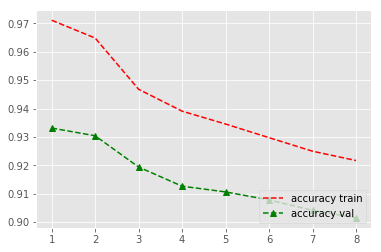

In [6]:
k_values = [2,3,5,6,7,8,9,10]
perf_train=[]
perf_val=[]
for k in tqdm(k_values):
    knn = KNeighborsClassifier(k)
    knn.fit(Xa, y_train)
    y_pred_train = knn.predict(Xa)
    y_pred_val=knn.predict(Xv)
    scores_train = accuracy_score(y_train, y_pred_train)
    scores_val=accuracy_score(y_val,y_pred_val)
    perf_train.append(scores_train)
    perf_val.append(scores_val)
plt.figure()
plt.plot(range(1,len(perf_train)+1),perf_train,"--r",range(1,len(perf_val)+1),perf_val,"--g^")
plt.legend(['accuracy train', 'accuracy val'],loc="lower right")
print('With all being CV, best k is '    +repr(k_values[perf_val.index(max(perf_val))])+ ' and best perf is ' + repr(max(perf_val)))

In [8]:
# valeur optimale de k:
from sklearn.metrics import confusion_matrix
def ConfusionMatrix(Y_predict, Y_true):
    confusion_matrix(Y_true, Y_predict,labels=np.unique(Y_true))
    confu = pd.DataFrame(confusion_matrix(Y_true, Y_predict,labels=np.unique(Y_true)),columns=np.unique(Y_true),index=np.unique(Y_true))
    confu["marge_true"]=confu.sum(axis=1)
    confu.loc["marge_pred"]=confu.sum(axis=0)
    #sn.heatmap(confu,annot=True,annot_kws={"size": 16})
    return confu

### Score obtenu avec la meilleure valeur de k sur les données test:

In [9]:
knn= KNeighborsClassifier(k_values[perf_val.index(max(perf_val))])
knn.fit(Xa,y_train)
pred_test=knn.predict(Xt)
d=ConfusionMatrix(Y_predict=pred_test,Y_true=y_test)
print("Le score de notre modèle sur les données test={}".format(np.mean(pred_test==y_test)))
d

Le score de notre modèle sur les données test=0.9320367825811225


,Finance_actuariat,chirurgien,cryptography,data scientist,dentist,developer,ditital_marketing,network_engineer,nurse,pharmacist,robotic,marge_true
Finance_actuariat,750,1,1,7,0,0,0,1,1,0,0,761
chirurgien,2,3687,3,5,57,1,4,1,135,21,19,3935
cryptography,2,7,1568,5,0,4,0,2,0,1,9,1598
data scientist,18,11,22,1590,0,18,9,6,7,3,8,1692
dentist,9,191,0,2,3823,0,8,1,21,8,1,4064
developer,4,7,12,57,2,979,10,4,3,9,3,1090
ditital_marketing,2,15,12,33,11,6,1782,3,3,1,2,1870
network_engineer,7,5,25,18,4,14,13,1789,2,2,7,1886
nurse,8,385,3,20,140,4,15,9,4808,63,4,5459
pharmacist,2,51,1,8,17,1,2,3,82,2965,1,3133


### Modélisation avec l'algorithme Naive baysian  

In [76]:
modelNV = MultinomialNB()
modelNV.fit(Xa,y_train)
pred = modelNV.predict(Xt)
print("Le score du modèle={}".format(modelNV.score(Xt,y_test)))
#sn.heatmap(confusion_matrix(pred,y_test),annot = True,annot_kws = {"size": 16});
ConfusionMatrix(pred,y_test)

Le score du modèle=0.8107176831201776


,Finance_actuariat,chirurgien,cryptography,data scientist,dentist,developer,ditital_marketing,network_engineer,nurse,pharmacist,robotic,marge_true
Finance_actuariat,394,63,0,123,41,0,0,0,560,7,72,1260
chirurgien,0,4361,0,1,240,0,5,1,1956,4,89,6657
cryptography,0,7,1779,1,2,0,4,41,151,2,645,2632
data scientist,0,6,0,2313,7,0,3,0,227,0,261,2817
dentist,0,69,0,0,5822,0,11,0,910,5,29,6846
developer,0,29,5,70,12,555,8,12,223,6,966,1886
ditital_marketing,0,34,0,22,45,0,2656,8,155,12,91,3023
network_engineer,0,3,5,2,6,0,0,2676,144,2,212,3050
nurse,0,82,0,0,4,0,0,0,8947,5,2,9040
pharmacist,0,8,0,0,29,0,0,0,1030,4278,2,5347


### Modélisation avec l'algorthime SVM lineaire:
#### Recherche du paramêtre optimal C:

Initialisation du modèle:

In [61]:
paramC = 1
clf_svm = LinearSVC(C = paramC)

Estimation de la meilleurs paramètre C:

/home/tantely/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/tantely/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/tantely/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C optimal = 1.6378937069540647


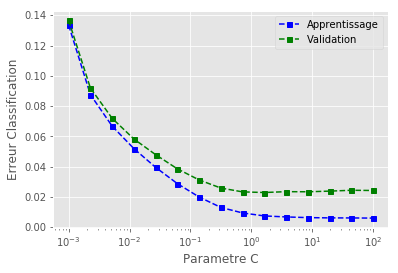

In [62]:
vectC = np.logspace(-3, 2, 15)
err_val = np.empty(vectC.shape[0])
err_app = np.empty(vectC.shape[0])
for ind_C, C in enumerate(vectC):
    clf_svm.C = C
    clf_svm.fit(Xa, y_train)
    # calcule erreur sur les donnees de validation et app
    err_val[ind_C] = 1 - accuracy_score(y_val, clf_svm.predict(Xv))
    err_app[ind_C] = 1 - accuracy_score(y_train, clf_svm.predict(Xa))
err_min_val, ind_min = err_val.min(), err_val.argmin()
Copt = vectC[ind_min]
print("\n C optimal = {}".format(Copt))
# Trace courbe erreur
plt.figure()
plt.semilogx(vectC, err_app, color="blue", linestyle="--", marker="s", markersize=5, label="Apprentissage")
plt.semilogx(vectC, err_val, color="green", linestyle="--", marker="s", markersize=5, label="Validation")
plt.xlabel("Parametre C")
plt.ylabel("Erreur Classification")
plt.legend(loc="best")
plt.show()

On constate qu'il n'y a pas beaucoup d'écart entre les erreurs dans l'apprentissage et les erreurs dans la validation de notre modèle.

## Score obtenu avec la meilleure valeur de C sur les données test:

In [67]:
clf_svm.C = Copt 
clf_svm.fit(Xa, y_train)
pred=clf_svm.predict(Xt)
score_svm=accuracy_score(y_test, clf_svm.predict(Xt))
print("Le score optimal pour svm={}".format(score_svm))
ConfusionMatrix(pred,y_test)

Le score optimal pour svm=0.9761336010992495


,Finance_actuariat,chirurgien,cryptography,data scientist,dentist,developer,ditital_marketing,network_engineer,nurse,pharmacist,robotic,marge_true
Finance_actuariat,1255,0,0,1,3,1,0,0,0,0,0,1260
chirurgien,1,6227,3,3,154,4,7,0,214,13,31,6657
cryptography,0,3,2605,0,0,1,0,8,0,0,15,2632
data scientist,5,1,1,2790,1,6,6,7,0,0,0,2817
dentist,2,116,3,0,6645,5,9,0,60,5,1,6846
developer,0,0,1,4,3,1863,2,0,4,0,9,1886
ditital_marketing,2,1,0,10,1,1,2995,1,6,0,6,3023
network_engineer,0,0,18,2,0,0,1,3022,4,0,3,3050
nurse,1,227,0,0,9,0,1,0,8786,12,4,9040
pharmacist,0,6,0,0,4,5,0,0,16,5316,0,5347


### Modélisation avec l'algorithme de la régression logistique

In [77]:
Lgre=LogisticRegression()
Lgre.fit(Xa,y_train)
pred=Lgre.predict(Xt)
print("score du modèle={}".format(Lgre.score(Xt,y_test)))
#sn.heatmap(confusion_matrix(pred,y_test),annot=True, fmt='.3f');
ConfusionMatrix(pred,y_test)

/home/tantely/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tantely/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Erreur du modèle=0.9615685445513159


,Finance_actuariat,chirurgien,cryptography,data scientist,dentist,developer,ditital_marketing,network_engineer,nurse,pharmacist,robotic,marge_true
Finance_actuariat,1229,0,0,22,3,4,0,0,2,0,0,1260
chirurgien,4,6010,8,4,191,7,13,0,358,12,50,6657
cryptography,0,0,2533,0,0,11,4,33,3,0,48,2632
data scientist,8,4,1,2744,2,18,6,7,14,0,13,2817
dentist,2,114,2,1,6518,4,20,5,167,7,6,6846
developer,0,1,1,20,0,1832,7,0,7,0,18,1886
ditital_marketing,1,3,0,13,1,2,2979,1,12,1,10,3023
network_engineer,0,0,36,9,0,1,0,2992,6,0,6,3050
nurse,0,252,0,4,5,0,1,0,8766,8,4,9040
pharmacist,0,20,0,0,6,6,0,0,29,5284,2,5347


## Optimisation de l'algorithme Naïf Baysian:
Pour faire l'optimisation, on va utiliser un Pipeline qui va nous permettre d'enchainer plusieurs transformation en une seule fois. D'autre part, La calibration de notre modèle va se faire sur la transformation de notre corpus de text en numérique(tf_idf), le lien entre 

In [8]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', MultinomialNB()),])


In [9]:
from sklearn.model_selection import GridSearchCV
parametre = {'vect__ngram_range': [(1, 1), (1, 2)],'tfidf__use_idf': (True, False),'clf__alpha': (1e-2, 1e-3)}
## n_job=-1 veut dire qu'on utilise l'ensemble des processeurs. 
NB_model= GridSearchCV(text_clf,parametre,n_jobs=-1)


In [10]:
NB_model=NB_model.fit(X_train,y_train)

/home/tantely/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [11]:
print("score du meilleurs modèle:",NB_model.best_score_)
print("les paramètres qui donnent le modèle optimal:",NB_model.best_params_) 

score du meilleurs modèle: 0.9524355993114487
les paramètres qui donnent le modèle optimal: {'clf__alpha': 0.001, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}


Sur les paramètres que l'on obtient, on peut dire que le modèle est meilleurs lorsque l'on n'utilise pas la pondération avec idf, car ici on a use_idf=False dan s la partie tf-idf. D'autre part, pour la partie vectorizer, on a comme paramètre ngram_range:(1,2), cela veut dire que l'on a construit notre matrice Fréquence de Terme à partir de la relation 2-gram. 

In [39]:
vectoriz=CountVectorizer(ngram_range=(1,2))
print(vectoriz.fit(["Hello world Whatsup","bonjour tout le monde"]).)
tran=vectoriz.transform(["Hello world","bonjour le monde"])

{'hello': 2, 'world': 10, 'whatsup': 9, 'hello world': 3, 'world whatsup': 11, 'bonjour': 0, 'tout': 7, 'le': 4, 'monde': 6, 'bonjour tout': 1, 'tout le': 8, 'le monde': 5}


In [40]:
tran.toarray()

array([[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0]])

### Evaluation du modèle à partir des données test:

In [101]:
NB_model.score(X_test,y_test)

0.9583553535567064

Sur notre modèle, on remarque que le score entre les données test et le gridsearch restent assez proche, donc on peut déjà dire que l'on ne fait pas de sur-apprentissage. D'autre part, sur les scores, on est aussi passé de 81% à 95% sur les scores.

In [118]:
corpus=["Hello world, Whatsup","Hey world, how are you","Good morning world, Are you fine"]
vectoriz=CountVectorizer(ngram_range=(1,2))

In [119]:
vectoriz.fit(corpus)
tran=vectoriz.transform(corpus)

In [117]:
tran.toarray()

array([[0, 0, 0, 1, 0, 0, 0, 1, 1, 0],
       [1, 0, 0, 0, 1, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0, 1, 0, 1, 1]])

In [41]:
tran.toarray()

array([[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0]])

## Word2vec method:

Word2vec est un groupe de modèles associés utilisés pour produire des incorporations de mots . Ces modèles sont des réseaux de neurones à deux couches peu profondes formés pour reconstruire les contextes linguistiques des mots. Word2vec prend en entrée un grand corpus de texte et crée un espace vectoriel , généralement de plusieurs centaines de dimensions , chaque mot unique du corpus étant associé à un vecteur correspondant

In [12]:
import gensim

reclean_text=[]
for x in X_train:
    reclean_text.append(gensim.utils.simple_preprocess(x))

In [13]:
model = gensim.models.Word2Vec(reclean_text,size=150,window=10,min_count=2,workers=10)
# To make the model memory efficient
model.init_sims(replace=True)

In [14]:
model.wv.syn0norm

/home/tantely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  """Entry point for launching an IPython kernel.


array([[-0.01412151, -0.02911667,  0.11848644, ...,  0.03243154,
        -0.04859224, -0.01350094],
       [ 0.0837061 ,  0.16223013, -0.02951479, ...,  0.04163713,
        -0.03430424, -0.04323665],
       [ 0.09879825,  0.15274322,  0.04386517, ...,  0.07164742,
        -0.05962464,  0.08637821],
       ...,
       [ 0.11390449,  0.15211469, -0.06637954, ...,  0.1186387 ,
        -0.05673444,  0.01223519],
       [ 0.08290468, -0.02575617, -0.01954884, ..., -0.02253071,
         0.08598673, -0.01681938],
       [-0.02093836,  0.00933726, -0.06666116, ...,  0.11405331,
         0.06746437,  0.04588412]], dtype=float32)

In [15]:
w1 = ["data"]
w2=["engineer"]

x

[('engineering', 0.639894962310791),
 ('developer', 0.5852555632591248),
 ('architect', 0.536454439163208),
 ('weekposting', 0.48037800192832947),
 ('drafter', 0.4726769030094147),
 ('ngms', 0.46953085064888)]

In [16]:
words=list(model.wv.vocab)
vect=[]
for word in words:
    vect.append(model[word].tolist())
data=np.array(vect)
data

/home/tantely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


array([[-0.06739987,  0.01608485, -0.09532426, ...,  0.09815955,
        -0.00022427,  0.13398272],
       [ 0.03489593,  0.13152274,  0.04805328, ..., -0.00187766,
         0.14716092, -0.02547006],
       [-0.02661698,  0.02495852,  0.04010939, ...,  0.04715573,
        -0.01040998, -0.07887734],
       ...,
       [ 0.0236948 ,  0.00659381,  0.03357509, ..., -0.08535966,
        -0.04912556,  0.00844506],
       [ 0.08290468, -0.02575617, -0.01954884, ..., -0.02253071,
         0.08598673, -0.01681938],
       [-0.02093836,  0.00933726, -0.06666116, ...,  0.11405331,
         0.06746437,  0.04588412]])

On peut alors constater dans notre cas que chaque mot de notre bag of word peut être représenté par un vecteur numérique.

In [17]:
#model.wv.most_similar(positive=["nurse"],topn=5)
n_word_label=np.unique(y_train)
n_word_label[1].split("_")

list_word=[]
for word in n_word_label:
    for k in word.split("_"):
        for l in k.split(" "):
            list_word.append(l.lower())

list_word[1]='actuary'
list_word[2]='surgeon'
list_word[8]='digital'

print(list_word)

['finance', 'actuary', 'surgeon', 'cryptography', 'data', 'scientist', 'dentist', 'developer', 'digital', 'marketing', 'network', 'engineer', 'nurse', 'pharmacist', 'robotic']


In [18]:
X = model.wv[list_word] # X is an array of word vectors, each vector containing 150 tokens
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
Y = tsne_model.fit_transform(X)

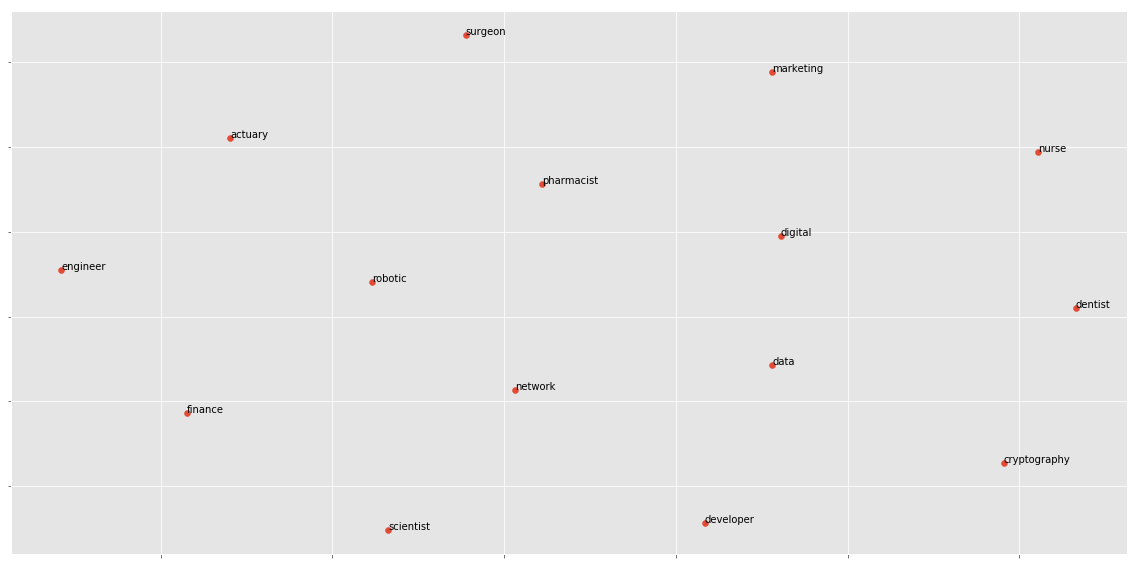

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(Y[:, 0], Y[:, 1])
words = list(list_word)
for i, word in enumerate(words):
    plt.annotate(word, xy=(Y[i, 0], Y[i, 1]))
ax.set_yticklabels([]) 
ax.set_xticklabels([]) 
_ = plt.show()

On remarque que les mots n'ont pas de relation logique entre eux. 

## Classification avec word2vec:

L'idée dans cette partie est d'utiliser les métriques qui se trouvent dans la construction de la méthode word2vec pour réaliser des prédictions. 
Plus précisément, quand nous allons modéliser nous allons appliquer sur chaqu'un des mots dans notre corpus un CBOW(continious Bag Of Word) pour construire un
réseau de neurone qui sera composé d'un couche caché. Donc pour faire le back propragation, nous allons obtenir des poids $W_{in}$ (entre les données d'entrée et la couche caché) et $W_{out}$ (entre la couche caché et la sortie).


<img src="image_file/word_embeding.png" width="400">


Nous allons définir une fonction qui va nous permettre de calculer la moyenne des vecteurs que l'on peut obtenir pour chaque mots dans notre corpus.
## Remarque:
Dans gensim, les deux matrices de poids sont syn0 et syn1. Dans la fonction qu'on va définier ci-dessous, on va utiliser syn0 normalisé.

In [20]:
import logging
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

## Tokenizer les mots:

In [21]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            else:
                tokens.append(word)
    return tokens

In [22]:
test_tokenized = X_test.apply(lambda r: w2v_tokenize_text(r)).values
train_tokenized = X_train.apply(lambda r: w2v_tokenize_text(r)).values

In [23]:
val_tokenized = X_val.apply(lambda r: w2v_tokenize_text(r)).values

In [16]:
#X_train_word_average = word_averaging_list(model.wv,train_tokenized)
#X_test_word_average = word_averaging_list(model.wv,test_tokenized)

#X_train_word_average = word_averaging_list(model.wv,reclean_text)
X_train_word_average

array([[-0.10766504,  0.11296782, -0.10563813, ..., -0.05156879,
        -0.02273908, -0.00372436],
       [ 0.00485332,  0.18609859, -0.13571453, ..., -0.00089446,
         0.06409808, -0.01887149],
       [-0.01072713,  0.12195555, -0.04319037, ..., -0.01243771,
         0.013438  ,  0.10089758],
       ...,
       [-0.11741962,  0.13035469, -0.06972109, ...,  0.01960327,
         0.00084553, -0.01709296],
       [-0.09057272,  0.00790588, -0.02541178, ..., -0.13149543,
        -0.1631154 ,  0.10452981],
       [ 0.05012202, -0.10070967,  0.16513011, ..., -0.06264692,
        -0.09095634,  0.10510645]], dtype=float32)

In [99]:
X_val_word_average=word_averaging_list(model.wv,val_tokenized)

/home/tantely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  if __name__ == '__main__':


In [84]:
## n_job=-1 veut dire qu'on utilise l'ensemble des processeurs.
md_NB=LogisticRegression()

In [94]:
md_NB.fit(X_train_word_average,y_train)

/home/tantely/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tantely/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [95]:
md_NB.score(X_test_word_average,y_test)

0.9238135503646548

## Optimisation des résultats:

In [91]:
md_NB=LogisticRegression()
parametre = {'C': [1e-2, 1e-3,1,1.5]}
NB_model= GridSearchCV(md_NB,parametre,n_jobs=-1)
NB_model.fit(X_train_word_average,y_train)

/home/tantely/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/tantely/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tantely/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.01, 0.001, 1, 1.5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [97]:
NB_model.score(X_test_word_average,y_test)

0.9264559771694324

L'amélioration n'est pas si important que cela, mais on peut déjà considérer que l'on a de bon résultat.

### SVM:

/home/tantely/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/tantely/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/tantely/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C optimal = 43.93970560760795


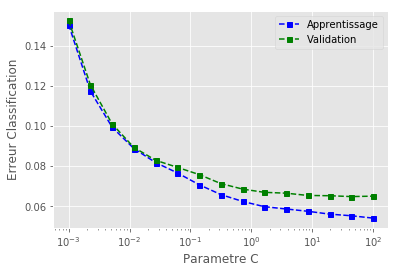

In [100]:
paramC = 1
clf_svm = LinearSVC(C = paramC)
vectC = np.logspace(-3, 2, 15)
err_val = np.empty(vectC.shape[0])
err_app = np.empty(vectC.shape[0])
for ind_C, C in enumerate(vectC):
    clf_svm.C = C
    clf_svm.fit(X_train_word_average, y_train)
    # calcule erreur sur les donnees de validation et app
    err_val[ind_C] = 1 - accuracy_score(y_val, clf_svm.predict(X_val_word_average))
    err_app[ind_C] = 1 - accuracy_score(y_train, clf_svm.predict(X_train_word_average))
err_min_val, ind_min = err_val.min(), err_val.argmin()
Copt = vectC[ind_min]
print("\n C optimal = {}".format(Copt))
# Trace courbe erreur
plt.figure()
plt.semilogx(vectC, err_app, color="blue", linestyle="--", marker="s", markersize=5, label="Apprentissage")
plt.semilogx(vectC, err_val, color="green", linestyle="--", marker="s", markersize=5, label="Validation")
plt.xlabel("Parametre C")
plt.ylabel("Erreur Classification")
plt.legend(loc="best")
plt.show()

In [103]:
clf_svm.C = Copt 
clf_svm.fit(X_train_word_average, y_train)
pred=clf_svm.predict(X_test_word_average)
score_svm=accuracy_score(y_test, clf_svm.predict(X_test_word_average))
print("Le score optimal pour svm={}".format(score_svm))
ConfusionMatrix(pred,y_test)

/home/tantely/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Le score optimal pour svm=0.9385477222280942


,Finance_actuariat,chirurgien,cryptography,data scientist,dentist,developer,ditital_marketing,network_engineer,nurse,pharmacist,robotic,marge_true
Finance_actuariat,1276,8,0,13,2,3,0,0,1,0,0,1303
chirurgien,2,5596,10,1,268,13,26,2,508,12,92,6530
cryptography,0,4,2488,12,7,13,1,42,2,0,96,2665
data scientist,11,3,10,2741,3,46,8,14,18,5,31,2890
dentist,0,179,14,0,6492,7,34,2,174,4,13,6919
developer,0,5,21,32,6,1693,7,13,5,0,20,1802
ditital_marketing,5,8,3,20,8,3,2953,5,15,1,12,3033
network_engineer,0,4,35,6,1,5,3,3070,0,0,17,3141
nurse,1,421,4,6,31,5,8,1,8509,64,14,9064
pharmacist,2,17,2,3,1,0,4,0,40,5157,0,5226


Pour le plongement de mot se basant sur la moyenne des metriques que sort le word2vec, on constate que les résultats des prédictions que l'on obtient n'est pas si efficace que celui du TF-IDF sur les deux algorithmes de références que l'on a choisis. 

## Autre méthodes:

In [24]:
def featureVecMethod(words, model, num_features):
    # Pre-initialising empty numpy array for speed
    featureVec = np.zeros(num_features,dtype="float32")
    nwords = 0
    
    #Converting Index2Word which is a list to a set for better speed in the execution.
    index2word_set = set(model.wv.index2word)
    
    for word in  words:
        if word in index2word_set:
            nwords = nwords + 1
            featureVec = np.add(featureVec,model[word])
    
    # Dividing the result by number of words to get average
    if nwords==0:
        return np.zeros(num_features,)
    featureVec = np.divide(featureVec, nwords)
    return featureVec

In [25]:
# Function for calculating the average feature vector
def getAvgFeatureVecs(reviews, model, num_features):
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        
        reviewFeatureVecs[counter] = featureVecMethod(review, model, num_features)
        counter = counter+1
        
    return reviewFeatureVecs

In [26]:
trainDataVecs = getAvgFeatureVecs(train_tokenized, model, 150)

/home/tantely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


In [27]:
testDataVecs = getAvgFeatureVecs(test_tokenized, model, 150)

/home/tantely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


In [31]:
md_NB=LogisticRegression()
md_NB.fit(trainDataVecs ,y_train)
np.sum(np.isnan(trainDataVecs))
np.sum(np.isnan(testDataVecs))

/home/tantely/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tantely/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0

In [32]:
md_NB.score(testDataVecs ,y_test)

0.8955360603177959

In [33]:
md_NB=LogisticRegression()
parametre={"C":[-0.5,-0.2,-0.1,0,0.1,0.5,1,2]}
lrg=GridSearchCV(md_NB,param_grid=parametre,n_jobs=-1)

46358

# Utilisation de Keras:

In [80]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_keras = tokenizer.texts_to_sequences(X_train)
X_test_keras = tokenizer.texts_to_sequences(X_test)
X_val_keras = tokenizer.texts_to_sequences(X_val)
 # Adding 1 because of reserved 0 index


print(X_train_keras[2])

Pour avoir une taille fixe de nos données, on va regarder qui est le document contenant le plus de mot. Nous allons fixer un pad par rapport à la longuer du document possèdant le plus de mot.Le numéro de chaque mot est dans tokenizer.word_index, donc comme il se peut que dans la suite on aurait besoin du nombre de mot total, on va alors prendre la longueur de tokenizer.word_index+1 pour avoir le nombre de mot qu'on a. (+1 car on numérote les mots à partir de 0)

In [126]:
tokenizer.word_index

{'experience': 1,
 'patient': 2,
 'care': 3,
 'work': 4,
 'team': 5,
 'service': 6,
 'required': 7,
 'skill': 8,
 'data': 9,
 'health': 10,
 'ability': 11,
 'system': 12,
 'year': 13,
 'the': 14,
 'support': 15,
 'including': 16,
 'opportunity': 17,
 'management': 18,
 'position': 19,
 'information': 20,
 'job': 21,
 'knowledge': 22,
 'medical': 23,
 'business': 24,
 'practice': 25,
 'customer': 26,
 'program': 27,
 'must': 28,
 'requirement': 29,
 'dental': 30,
 'network': 31,
 'provide': 32,
 'development': 33,
 'pharmacy': 34,
 'nursing': 35,
 'technology': 36,
 'education': 37,
 'employee': 38,
 'product': 39,
 'clinical': 40,
 'new': 41,
 'security': 42,
 'professional': 43,
 'environment': 44,
 'state': 45,
 'responsibility': 46,
 'preferred': 47,
 'qualification': 48,
 'company': 49,
 'process': 50,
 'we': 51,
 'degree': 52,
 'procedure': 53,
 'working': 54,
 'design': 55,
 'need': 56,
 'application': 57,
 'may': 58,
 'time': 59,
 'project': 60,
 'nurse': 61,
 'plan': 62,
 'stat

In [128]:
vocab_size=len(tokenizer.word_index)+1

Le nombre de mot (sans doublon) qu'on a dans notre corpus vaut alors:

In [129]:
vocab_size

126532

Recherche de la longueur maximal d'un offre d'emploi.

In [118]:
tab=[]
for i,k in enumerate(data.description):
    tab.append(len(k.split(" ")))

3688

Découpons maintenant nos mots avec des longueurs de sequance maximales:

In [130]:
from keras.preprocessing.sequence import pad_sequences

maxlen = np.max(tab)

X_train_keras1 = pad_sequences(X_train_keras, padding='post', maxlen=maxlen)
X_test_keras1 = pad_sequences(X_test_keras, padding='post', maxlen=maxlen)


In [136]:
X_train_keras1.shape

(46358, 3688)

Encodage des labels:

In [132]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
le =LabelEncoder()
le.fit(y_train)
Ya=to_categorical(le.transform(y_train))
Yt=to_categorical(le.transform(y_test))
Yv=to_categorical(le.transform(y_val))

Modélisation

In [141]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(11, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 3688, 50)          6326600   
_________________________________________________________________
flatten_6 (Flatten)          (None, 184400)            0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1844010   
_________________________________________________________________
dense_12 (Dense)             (None, 11)                121       
Total params: 8,170,731
Trainable params: 8,170,731
Non-trainable params: 0
_________________________________________________________________


Entrainement du modèle et évaluation:

In [142]:
history = model.fit(X_train_keras1, Ya,epochs=10,verbose=False,validation_split=0.25,batch_size=10)

In [144]:
loss, accuracy = model.evaluate(X_train_keras1, Ya, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_keras1, Yt, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.1917
Testing Accuracy:  0.1904


In [145]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

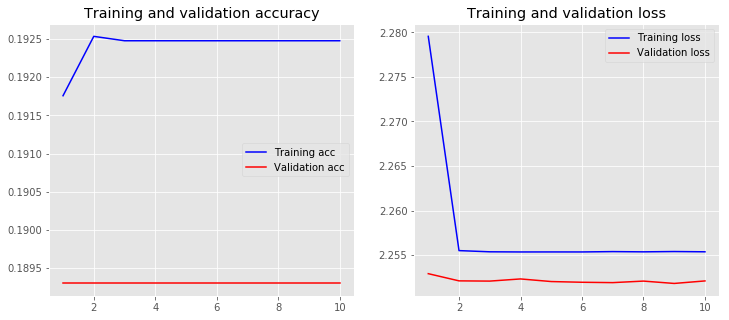

In [146]:
plot_history(history)

On constate que les résultats qu'on obtient ne sont pas du tout satisfaisant avec un score de 19.04% d'accuracy sur les données test. On va alors essayer d'améliorer ces résultats en utilisant d'autres types de méthodes de 

## CNN Methode:

In [149]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(100, 10, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(11, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 3688, 50)          6326600   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 3679, 100)         50100     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_14 (Dense)             (None, 11)                121       
Total params: 6,377,831
Trainable params: 6,377,831
Non-trainable params: 0
_________________________________________________________________


Entrainement du modèle:

In [150]:
history = model.fit(X_train_keras1, Ya,epochs=10,validation_split=0.25,batch_size=10)

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 34768 samples, validate on 11590 samples
Epoch 1/10
34768/34768 [==============================] - 1144s 33ms/step - loss: 0.3196 - acc: 0.8948 - val_loss: 0.0789 - val_acc: 0.9817
Epoch 2/10
34768/34768 [==============================] - 1057s 30ms/step - loss: 0.0589 - acc: 0.9831 - val_loss: 0.0699 - val_acc: 0.9807
Epoch 3/10
34768/34768 [==============================] - 1072s 31ms/step - loss: 0.0423 - acc: 0.9882 - val_loss: 0.0887 - val_acc: 0.9748
Epoch 4/10
34768/34768 [==============================] - 1131s 33ms/step - loss: 0.0380 - acc: 0.9889 - val_loss: 0.0775 - val_acc: 0.9808
Epoch 5/10
34768/34768 [==============================] - 1072s 31ms/step - loss: 0.0325 - acc: 0.9902 - val_loss: 0.0803 - val_acc: 0.9768
Epoch 6/10
34768/34768 [==============================] - 1059s 30ms/step - loss: 0.0326 - acc: 0.9902 - val_loss: 0.0819 - val_acc: 0.9798
Epoch 7/10
34768/34768 [========

In [152]:
loss, accuracy = model.evaluate(X_train_keras1, Ya, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_keras1, Yt, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9896
Testing Accuracy:  0.9788


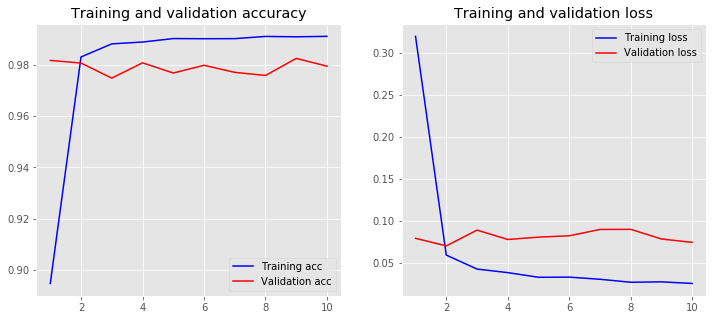

In [153]:
plot_history(history)